In [2]:
# Importing necessary Libraries 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#!pip install geopandas contextily shapely
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx  # For basemap tiles
import pandas as pd
import re

### Reading the Dataset

In [3]:
# Load the earthquake dataset from a CSV file into a pandas DataFrame.
df = pd.read_csv('earthquake.csv')

In [4]:
# time : Time When the event event occured.We indicate the date and time when the earthquake initiates  rupture, which is known as the "origin" time.

# latitude : [-90.0, 90.0] Decimal degrees latitude. Negative values for southern latitudes.

# longitude : [-180.0, 180.0] Decimal degrees longitude. Negative values for western longitudes.

# depth :Depth of the event in kilometers.The depth where the earthquake begins to rupture.

# mag  : [-1.0, 10.0]The magnitude reported is that which the U.S. Geological Survey considers official for this earthquake

# magType : The method or algorithm used to calculate the preferred magnitude for the event.
            # “Md”, “Ml”, “Ms”, “Mw”, “Me”, “Mi”, “Mb”, “MLg”
            # Md - Based on duration of shaking as measured by the time decay of the amplitude of sesimogram(< 4)
            # Ml : Ml values are calculated using modern equipment. ranges from 2 to 6.5
            # Ms - 20 seconds Raleigh surface wave (5 to 8.5)
            # Mw - Moment W-Phase ranges (> 5)
            # Me - based on the sesimic energy radiated (Energy) - (> 3.5)
            # Mi - Integrated P Wave ( 5 to 8)
            # mb - Short period body wave (4 to 6.5)
            # Mlg - Short Period surface wave (3.5-7.0)
   # https://www.usgs.gov/programs/earthquake-hazards/magnitude-types
            
# nst : The total number of seismic stations used to determine earthquake location.

# gap : [0.0, 180.0] The largest azimuthal gap between azimuthally adjacent stations (in degrees).The smaller this number, the more reliable is the calculated horizontal position of the earthquake.

# dmin : [0.4, 7.1] Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. In general, the smaller this number, the more reliable is the calculated depth of the earthquake.

# rms : The root-mean-square (RMS) travel time residual, in sec, using all weights. This parameter provides a measure of the fit of the observed arrival times to the predicted arrival times for this location. Smaller numbers reflect a better fit of the data. The value is dependent on the accuracy of the velocity model used to compute the earthquake location, the quality weights assigned to the arrival time data, and the procedure used to locate the earthquake.

# net : The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event. like earthquake centers, volcano observatory ..etc.
        #ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw 
        
# id : Eight Character network unique code assigned to each event. 
          #  ci15296281,us2013mqbd,at00mji9pf,...
            
# updated : Time when the event was most recently updated. Times are reported in milliseconds since the epoch. In certain output formats, the date is formatted for readability.

# place : Textual description of named geographic region near to the event. This may be a city name, or a Flinn-Engdahl Region name.

# type : Type of seismic event.
        # earthquake,quarry 
        
# horizontalError : Uncertainty of reported location of the event in kilometers.
            # [0, 100]
# depthError : The depth error, in km, defined as the largest projection of the three principal errors on a vertical line. 
        # [0, 100]
        
# magError :Uncertainty of reported magnitude of the event. The estimated standard error of the magnitude. The uncertainty corresponds to the specific magnitude type being reported and does not take into account magnitude variations and biases between different magnitude scales.
        # [0, 100]
        
# magNst : The total number of seismic stations used to calculate the magnitude for this earthquake.

# status : Indicates whether the event has been reviewed by a human.
#         “automatic”, “reviewed”, “deleted”
# Automatic events are directly posted by automatic processing systems and have not been verified or altered by a human.
# Reviewed events have been looked at by a human. The level of review can range from a quick validity check to a careful reanalysis of the event.


# # locationSource : The network that originally authored the reported location of this event.
#     ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw

# # magSource : Network that originally authored the reported magnitude for this event
#     ak, at, ci, hv, ld, mb, nc, nm, nn, pr, pt, se, us, uu, uw
    

In [5]:
# Displaying the loaded dataset of first 5 rows
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-01-01T00:27:51.990Z,40.477167,-124.322333,19.08,2.88,md,27.0,122.0,0.01167,0.10,...,2022-03-12T22:18:59.040Z,"12km SSW of Ferndale, CA",earthquake,0.34,0.19,0.221,43.0,reviewed,nc,nc
1,2022-01-01T06:10:48.010Z,35.899500,-120.441000,5.65,3.29,ml,59.0,53.0,0.01418,0.10,...,2022-03-12T22:18:59.040Z,"1km W of Parkfield, CA",earthquake,0.14,0.16,0.164,91.0,reviewed,nc,nc
2,2022-01-01T08:33:48.700Z,38.774500,-122.728000,1.53,2.67,md,80.0,47.0,0.01107,0.08,...,2022-03-12T22:18:56.040Z,"2km E of The Geysers, CA",earthquake,0.11,0.15,0.114,49.0,reviewed,nc,nc
3,2022-01-01T09:48:40.700Z,38.109667,-118.955667,16.63,2.68,md,34.0,82.0,0.38110,0.15,...,2022-03-12T22:18:56.040Z,"12km SSE of Bodie, CA",earthquake,0.38,1.21,0.244,35.0,reviewed,nc,nc
4,2022-01-01T12:44:57.081Z,31.396500,-115.367400,21.03,3.10,ml,NaN,140.0,0.35600,0.46,...,2022-03-12T22:18:58.040Z,"65 km NW of San Felipe, Mexico",earthquake,1.20,11.20,0.070,27.0,reviewed,us,us


In [6]:
# Displaying the bottom 5 rows of the data set 
df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
5137,2023-12-31T19:10:31.706Z,43.930700,-105.615800,0.00,3.00,ml,13.0,135.0,1.15500,1.12,...,2024-03-02T21:39:35.040Z,"22 km NNW of Wright, Wyoming",mining explosion,6.09,1.807,0.056,42.0,reviewed,us,us
5138,2023-12-31T20:17:44.060Z,39.010333,-123.306000,4.27,2.78,md,64.0,52.0,0.04029,0.08,...,2024-03-02T21:39:35.040Z,"5 km E of Boonville, CA",earthquake,0.10,0.320,0.244,98.0,reviewed,nc,nc
5139,2023-12-31T20:23:46.573Z,44.356100,-105.503400,0.00,2.90,ml,13.0,114.0,1.08100,0.71,...,2024-03-02T21:39:35.040Z,"7 km N of Gillette, Wyoming",mining explosion,3.41,1.827,0.057,40.0,reviewed,us,us
5140,2023-12-31T20:28:15.190Z,33.678667,-116.796667,15.68,2.52,ml,111.0,16.0,0.06462,0.19,...,2024-03-02T21:39:31.040Z,"10 km SW of Idyllwild, CA",earthquake,0.12,0.270,0.208,25.0,reviewed,ci,ci
5141,2023-12-31T21:02:12.253Z,44.145900,-105.463300,0.00,2.60,ml,13.0,150.0,1.02800,0.51,...,2024-03-02T21:39:37.040Z,"8 km S of Antelope Valley-Crestview, Wyoming",mining explosion,9.10,1.752,0.074,24.0,reviewed,us,us


### Analysing the Dataset

<!-- time = when the event occurent 
tsunami  -->

### Getting Dataset Information

In [7]:
# Returns the number of rows and columns
df.shape

(5142, 22)

In [8]:
# Display the column names 
df.columns 

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [9]:
# Convert the 'time' column to datetime format
df["time"]=pd.to_datetime(df["time"])
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-01-01 00:27:51.990000+00:00,40.477167,-124.322333,19.08,2.88,md,27.0,122.0,0.01167,0.10,...,2022-03-12T22:18:59.040Z,"12km SSW of Ferndale, CA",earthquake,0.34,0.19,0.221,43.0,reviewed,nc,nc
1,2022-01-01 06:10:48.010000+00:00,35.899500,-120.441000,5.65,3.29,ml,59.0,53.0,0.01418,0.10,...,2022-03-12T22:18:59.040Z,"1km W of Parkfield, CA",earthquake,0.14,0.16,0.164,91.0,reviewed,nc,nc
2,2022-01-01 08:33:48.700000+00:00,38.774500,-122.728000,1.53,2.67,md,80.0,47.0,0.01107,0.08,...,2022-03-12T22:18:56.040Z,"2km E of The Geysers, CA",earthquake,0.11,0.15,0.114,49.0,reviewed,nc,nc
3,2022-01-01 09:48:40.700000+00:00,38.109667,-118.955667,16.63,2.68,md,34.0,82.0,0.38110,0.15,...,2022-03-12T22:18:56.040Z,"12km SSE of Bodie, CA",earthquake,0.38,1.21,0.244,35.0,reviewed,nc,nc
4,2022-01-01 12:44:57.081000+00:00,31.396500,-115.367400,21.03,3.10,ml,NaN,140.0,0.35600,0.46,...,2022-03-12T22:18:58.040Z,"65 km NW of San Felipe, Mexico",earthquake,1.20,11.20,0.070,27.0,reviewed,us,us


In [10]:
# Get the minimum and maximum times
min_date = df['time'].min()
max_date = df['time'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2022-01-01 00:27:51.990000+00:00
Maximum Date: 2023-12-31 21:02:12.253000+00:00


In [11]:
# Function to split address and state
def split_address_state(place):
    if "," in place:
        address, state = place.rsplit(",", 1)  # Split from the last comma
        return address.strip(), state.strip()
    else:
        return place.strip(), "Unknown"  # If no comma, return full as address

# Apply function to create new columns
df[["Address", "State"]] = df["place"].apply(lambda x: pd.Series(split_address_state(x)))

# # Save the DataFrame to an Excel file
# df.to_excel("place_state_extracted.xlsx", index=False)

# print("File saved successfully as 'place_state_extracted.xlsx'")

In [12]:
df['State'].unique()

array(['CA', 'Mexico', 'Nevada', 'Wyoming', 'New Mexico', 'Texas',
       'Arizona', 'Idaho', 'South Carolina', 'Kansas', 'Utah', 'Ohio',
       'Montana', 'MX', 'United States', 'Minnesota', 'Canada', 'Unknown',
       'South Dakota', 'Georgia', 'Oklahoma', 'New Hampshire',
       'Washington', 'New York', 'Tennessee', 'Oregon', 'California',
       'Colorado', 'Illinois', 'Missouri', 'Maine', 'Arkansas', 'NV',
       'Nebraska', 'Alabama', 'Louisiana', 'North Carolina',
       'Mississippi', 'Kentucky', 'Virginia', 'WA', 'Indiana',
       'Massachusetts'], dtype=object)

In [13]:
# Define the list of states you're interested in
states_to_filter = ['Texas', 'New Mexico', 'Oklahoma', 'Kansas']

# Filter the DataFrame for rows where the 'State' column is in the list of selected states
df = df[df['State'].isin(states_to_filter)]
df.shape

(1715, 24)

In [85]:
# Selecting the required columns
df_eq = df[["latitude", "longitude", "mag", "State"]]

# Display the first few rows to verify
print(df_eq.head())

# Save to an Excel file if needed
df_eq.to_excel("df_eq.xlsx", index=False)
df_eq.shape

     latitude   longitude  mag       State
8   31.753642 -104.580418  2.6  New Mexico
10  31.750730 -104.599782  2.6  New Mexico
11  32.286987 -101.775200  3.2       Texas
12  31.617394 -104.012684  2.7       Texas
14  31.656510 -104.300282  3.2  New Mexico


(1714, 4)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1714 entries, 8 to 5136
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             1714 non-null   datetime64[ns, UTC]
 1   latitude         1714 non-null   float64            
 2   longitude        1714 non-null   float64            
 3   depth            1714 non-null   float64            
 4   mag              1714 non-null   float64            
 5   magType          1714 non-null   object             
 6   nst              1714 non-null   float64            
 7   gap              1714 non-null   float64            
 8   dmin             1714 non-null   float64            
 9   rms              1714 non-null   float64            
 10  net              1714 non-null   object             
 11  id               1714 non-null   object             
 12  updated          1714 non-null   object             
 13  place            1714 n

In [38]:
df['magType'].unique
# The method or algorithm used to calculate the preferred magnitude for the event.
# Get counts of each unique magType
mag_type_counts = df['magType'].value_counts()
mag_type_counts

magType
ml            1486
ml(texnet)     144
mb_lg           69
mlv             11
mwr              3
mww              1
mb               1
Name: count, dtype: int64

In [39]:
#Replace ml(texnet) with ml
df['magType'] = df['magType'].replace('ml(texnet)', 'ml')

/var/folders/k3/d8z_dxn96jd00k571s9c8sx40000gn/T/ipykernel_33463/2546663138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['magType'] = df['magType'].replace('ml(texnet)', 'ml')


In [40]:
#checking the count after merging ml(texnet) in ml
mag_type_counts = df['magType'].value_counts()
mag_type_counts

magType
ml       1630
mb_lg      69
mlv        11
mwr         3
mww         1
mb          1
Name: count, dtype: int64

In [41]:
# count of each event type 
event_type_counts = df['type'].value_counts()
event_type_counts

type
earthquake      1714
quarry blast       1
Name: count, dtype: int64

In [42]:
# Replace values of Quarry blast and Explosion with mining explosion 
df['type'] = df['type'].replace({'quarry blast': 'mining explosion', 'explosion': 'mining explosion'})

/var/folders/k3/d8z_dxn96jd00k571s9c8sx40000gn/T/ipykernel_33463/4065227210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].replace({'quarry blast': 'mining explosion', 'explosion': 'mining explosion'})


In [43]:
# count of each event type 
event_type_counts = df['type'].value_counts()
event_type_counts

type
earthquake          1714
mining explosion       1
Name: count, dtype: int64

In [44]:
# Filter the DataFrame for rows where the 'type' column is 'earthquake'
df_earthquakes = df[df['type'] == 'earthquake']
df = df_earthquakes
df['type'].value_counts()

type
earthquake    1714
Name: count, dtype: int64

In [45]:
# Descriptive statistics for numerical columns 
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1714.000000,1714.000000,1714.000000,1714.000000,1683.000000,1714.000000,1714.000000,1714.000000,1591.000000,1714.000000,1710.000000,1714.000000
mean,32.195052,-102.909904,6.848529,2.847186,29.123589,67.539694,0.101349,0.229484,1.214123,1.436533,0.138739,20.361727
std,1.843239,2.491240,2.095704,0.374663,20.778377,23.414891,0.192584,0.118060,0.757443,1.184441,0.069515,17.509529
min,27.542900,-109.023000,0.024455,2.500000,6.000000,21.000000,0.000000,0.100000,0.000000,0.200000,0.000000,3.000000
25%,31.615103,-104.387727,6.082458,2.600000,17.000000,56.000000,0.022331,0.200000,0.757732,0.749571,0.100000,11.000000
50%,31.671753,-104.111927,6.877100,2.700000,22.000000,64.000000,0.054829,0.200000,1.024958,1.126778,0.100000,15.000000
75%,31.997500,-102.024954,7.758039,3.000000,32.000000,76.000000,0.100000,0.300000,1.425494,1.774703,0.200000,25.000000
max,39.751700,-93.873900,28.489787,5.400000,101.000000,273.000000,2.966000,1.070000,10.890000,8.879000,1.000000,177.000000


In [46]:
# Display a concise summary of the DataFrame, including data types, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1714 entries, 8 to 5136
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             1714 non-null   datetime64[ns, UTC]
 1   latitude         1714 non-null   float64            
 2   longitude        1714 non-null   float64            
 3   depth            1714 non-null   float64            
 4   mag              1714 non-null   float64            
 5   magType          1714 non-null   object             
 6   nst              1683 non-null   float64            
 7   gap              1714 non-null   float64            
 8   dmin             1714 non-null   float64            
 9   rms              1714 non-null   float64            
 10  net              1714 non-null   object             
 11  id               1714 non-null   object             
 12  updated          1714 non-null   object             
 13  place            1714 n

### Checking Missing Values

In [47]:
# Calculate the total number of missing (NaN) values in each column of the DataFrame.
df.isnull().sum()  

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                 31
gap                  0
dmin                 0
rms                  0
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError    123
depthError           0
magError             4
magNst               0
status               0
locationSource       0
magSource            0
Address              0
State                0
dtype: int64

In [49]:
# Found missing values in nst,dmin,horizontalerror,magerror,magNst,
# nst : The total number of seismic stations used to determine earthquake location.
# dmin : Horizontal distance from the epicenter to the nearest station (in degrees). between [0.4,7.1]
# horizontal error : Uncertainty of reported location of the event in kilometers. [0,100]
# magError : Uncertainty of reported magnitude of the event. The estimated standard error of the magnitude.  [0,100]
# magnst : The total number of seismic stations used to calculate the magnitude for this earthquake.

### Handling Missing Values in the nst,dmin,horizontalError,magError Columns

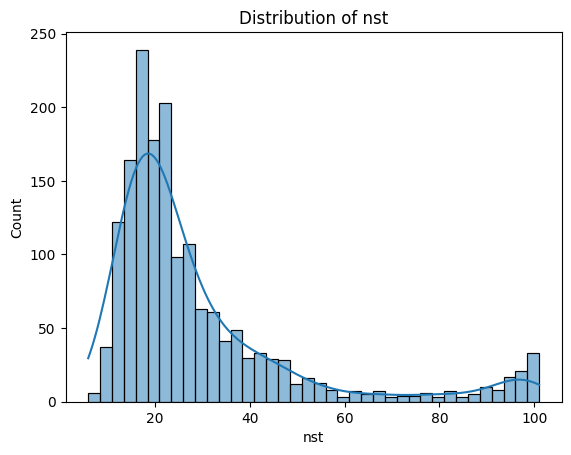

In [50]:
# Generating distribution plot for nst 
sns.histplot(df['nst'].dropna(), kde=True)
plt.title('Distribution of nst')
plt.show()

In [51]:
print("Skewness of nst:", df['nst'].skew())

Skewness of nst: 2.086019308489843


In [52]:
# Replace missing values in the 'nst' column with the column's "Median" value.
# Because some earthquakes are recorded by very few stations while others are recorded by many. So median is best compared to mean.
df['nst'] = df['nst'].fillna(df['nst'].median())


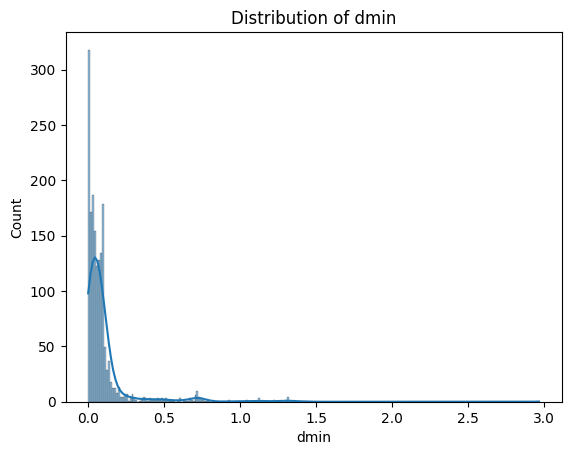

In [53]:
# dmin : [0.4, 7.1] Horizontal distance from the epicenter to the nearest station (in degrees)
# Generating distribution plot for dmin 
sns.histplot(df['dmin'].dropna(), kde=True)
plt.title('Distribution of dmin')
plt.show()

In [54]:
# Finding the mean of dmin
mean_dmin = df['dmin'].mean()
mean_dmin 

np.float64(0.10134865527071178)

In [55]:
# Finding the median of dmin
median_dmin = df['dmin'].median()
median_dmin 

np.float64(0.0548291075)

In [56]:
# Replace missing values in the 'dmin' column with a constant value of 0.4.Because the median and mean is less than 0.4
df['dmin'] = df['dmin'].fillna(0.4) 

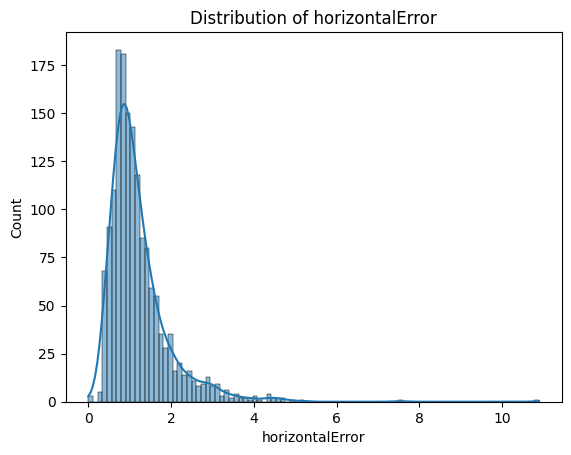

In [57]:
# Generating distribution plot for horizontalError 
sns.histplot(df['horizontalError'].dropna(), kde=True)
plt.title('Distribution of horizontalError')
plt.show()

In [58]:
print("Skewness of horizontalError:", df['horizontalError'].skew())

Skewness of horizontalError: 3.1798054697965976


In [59]:
# Replace missing values in the 'horizontalError' column with the column's median value.
df['horizontalError'] = df['horizontalError'].fillna(df['horizontalError'].median())

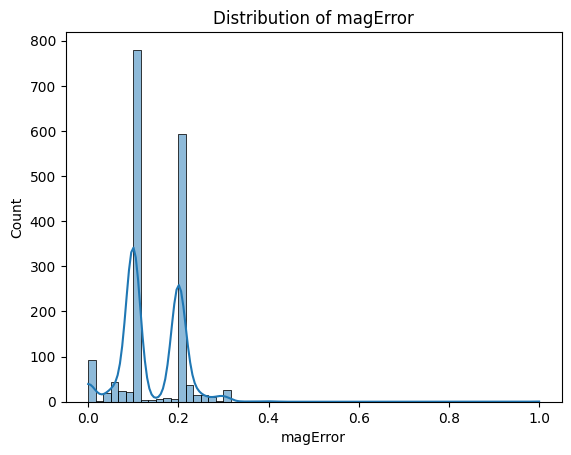

In [60]:
# magError : Uncertainty of reported magnitude of the event. The estimated standard error of the magnitude. 
#The uncertainty corresponds to the specific magnitude type being reported and does not take into
# account magnitude variations and biases between different magnitude scales.
# Generating distribution plot for magError 
sns.histplot(df['magError'].dropna(), kde=True)
plt.title('Distribution of magError')
plt.show()

In [61]:
print("Skewness of magError:", df['magError'].skew())

Skewness of magError: 1.1906309457355788


In [62]:
# Replace missing values in the 'magError' column with the column's median value.
df['magError'] = df['magError'].fillna(df['magError'].median()) 

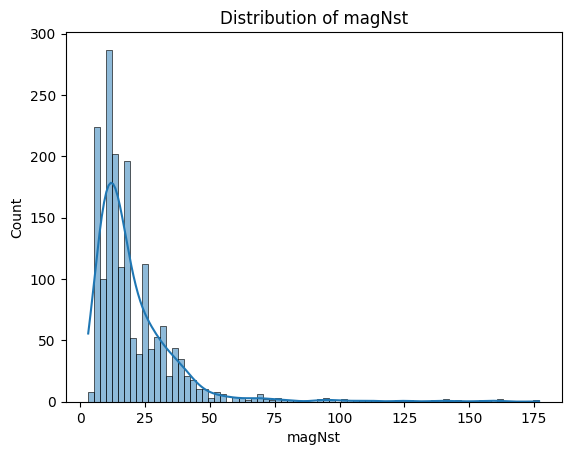

In [63]:
# magNst : The total number of seismic stations used to calculate the magnitude for this earthquake.
# Generating distribution plot for magnst 
sns.histplot(df['magNst'].dropna(), kde=True)
plt.title('Distribution of magNst')
plt.show()

In [64]:
print("Skewness of magNst:", df['magNst'].skew())

Skewness of magNst: 3.831873003939737


In [65]:
# Replace missing values in the 'magNst' column with the column's mean value.
df['magNst'] = df['magNst'].fillna(df['magNst'].median())

### Checking Missing Values after imputation 

In [66]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
Address            0
State              0
dtype: int64

## Data Distribution and Visualization

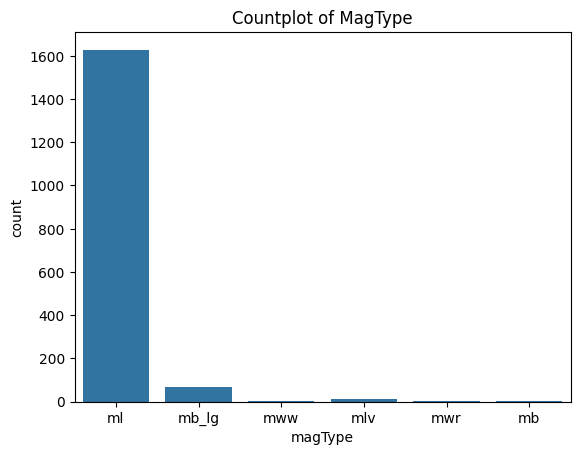

In [67]:
# Countplot of magType
sns.countplot(data=df, x='magType')
plt.title('Countplot of MagType')
plt.show()

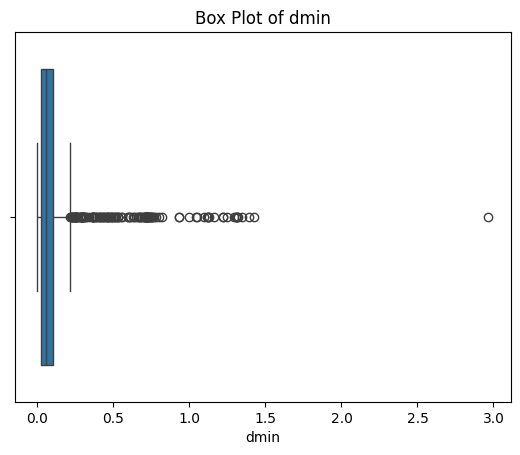

In [68]:
# Generating box plot for
sns.boxplot(x=df['dmin'])
plt.title('Box Plot of dmin')
plt.show()

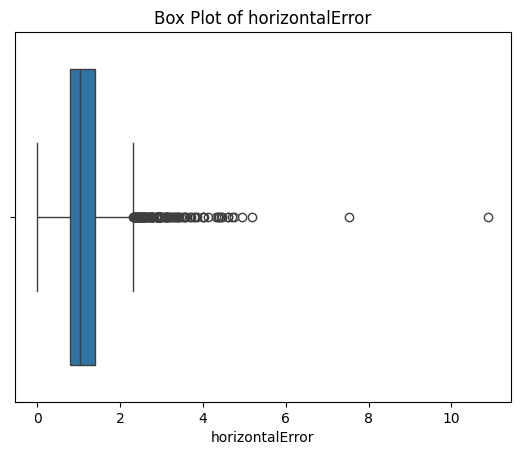

In [69]:
sns.boxplot(x=df['horizontalError'])
plt.title('Box Plot of horizontalError')
plt.show()

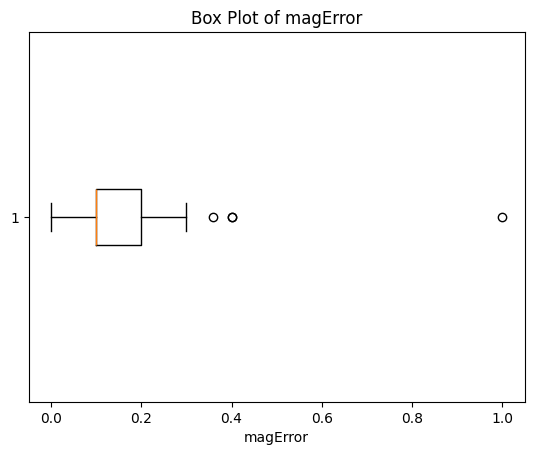

In [70]:
# Box plot for 'magError'
plt.boxplot(df['magError'].dropna(), vert=False)  # Use dropna() to exclude missing values
plt.title('Box Plot of magError')
plt.xlabel('magError')
plt.show()

<Axes: xlabel='type'>

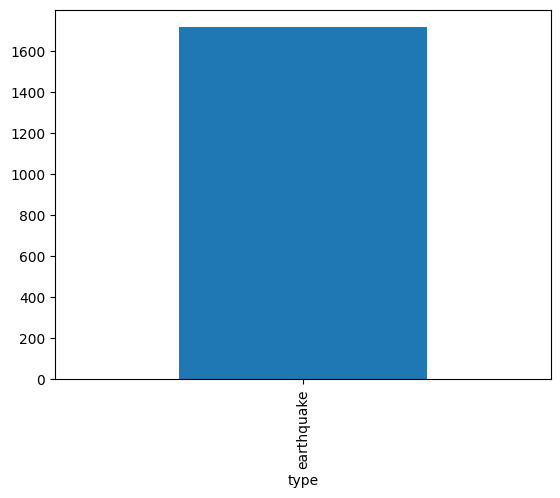

In [71]:
# Bar plot for type and it counts
df['type'].value_counts().plot(kind='bar')

<Axes: xlabel='place'>

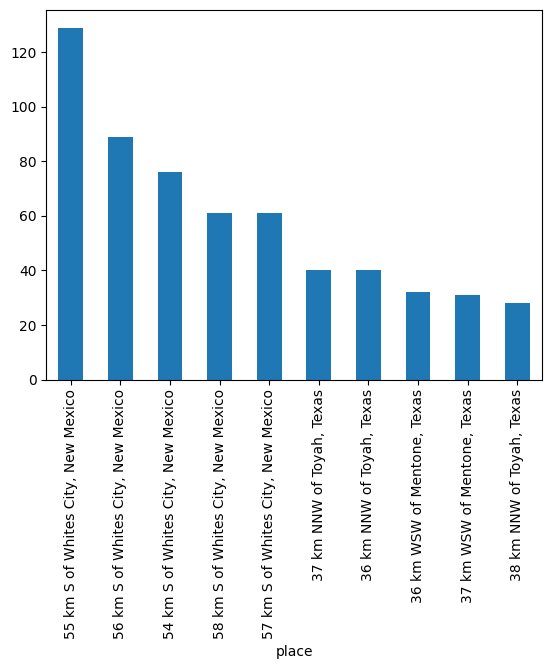

In [72]:
# Event happened near to the location for top 10 cities or locations.
place_count=df['place'].value_counts()
place_count.head(10).plot(kind='bar')

In [73]:
# Automatic events are directly posted by automatic processing systems andhave not been verified or altered by a human.
# Reviewed events have been looked at by a human. 
df['status'].value_counts()

status
reviewed     1711
automatic       3
Name: count, dtype: int64

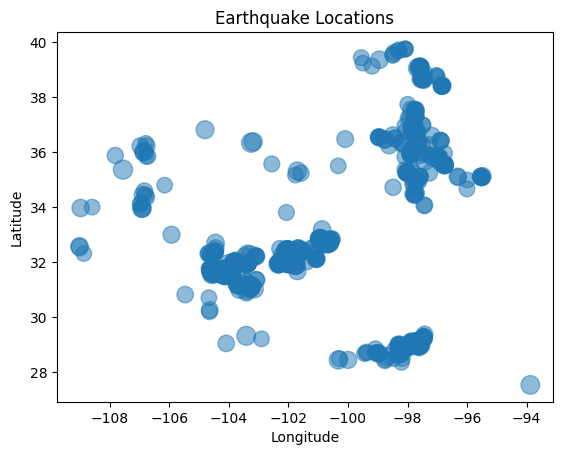

In [74]:
import matplotlib.pyplot as plt

# Extract the latitude, longitude, and magnitude columns
latitude = df['latitude']
longitude = df['longitude']
magnitude = df['mag']

# Create the scatter plot
plt.scatter(longitude, latitude, s=magnitude*50, alpha=0.5)

# Add a title and labels to the axes
plt.title('Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

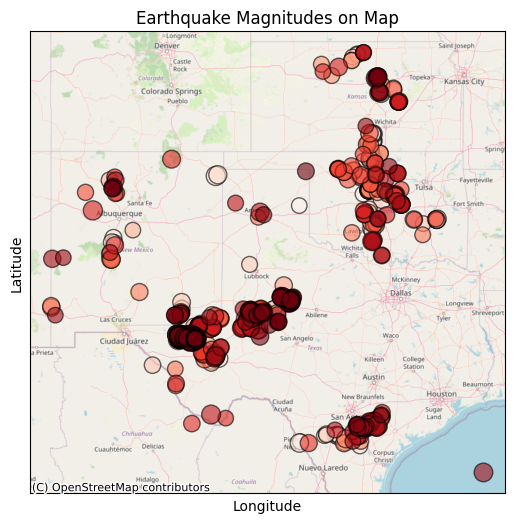

In [75]:

# Convert DataFrame to GeoDataFrame
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")  # WGS84 CRS

# Convert to Web Mercator (EPSG:3857) for basemap compatibility
gdf = gdf.to_crs(epsg=3857)

# Plot the earthquake locations
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, markersize=gdf['mag']*50, alpha=0.6, c=gdf['mag'], cmap='Reds', edgecolor='black', legend=True)

# Add basemap (satellite or street view)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # You can change the tile source

# Customize plot
plt.title("Earthquake Magnitudes on Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xticks([])
plt.yticks([])

plt.show()

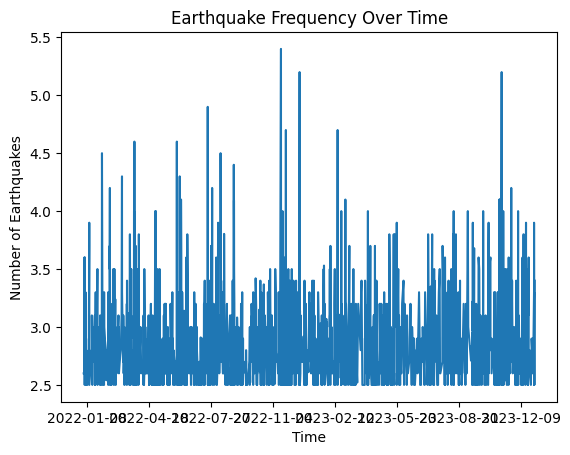

In [76]:
import matplotlib.dates as mdates

# Extract the time column
time = df['time']

# Convert the dates to numerical values
time_num = mdates.date2num(time)

# Create the line plot
plt.plot(time_num, magnitude)

# Add a title and labels to the axes
plt.title('Earthquake Frequency Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Earthquakes')

# Format the x-axis to show dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Show the plot
plt.show()

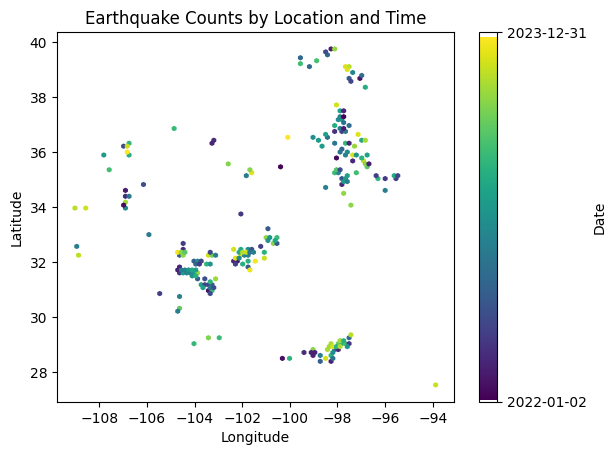

In [77]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Extract the latitude, longitude, and time columns
latitude = df['latitude']
longitude = df['longitude']
time = df['time']

# Convert the time to numerical values (for hexbin color scaling)
time_num = mdates.date2num(time)

# Create the heat map using the numerical time values for coloring
plt.hexbin(longitude, latitude, C=time_num, cmap='viridis')

# Add a colorbar with date formatting
cbar = plt.colorbar()
cbar.set_label('Date')

# Format the ticks on the colorbar to show dates
cbar.set_ticks([time_num.min(), time_num.max()])  # Set range for date ticks
cbar.set_ticklabels([mdates.num2date(time_num.min()).strftime('%Y-%m-%d'),
                     mdates.num2date(time_num.max()).strftime('%Y-%m-%d')])

# Add a title and labels to the axes
plt.title('Earthquake Counts by Location and Time')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

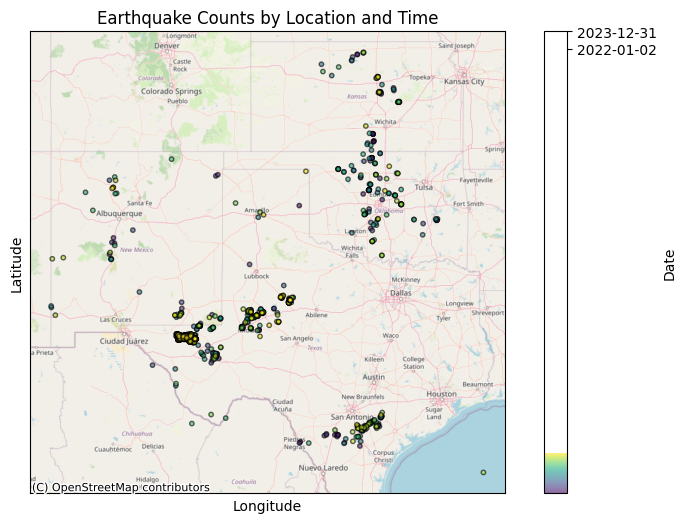

In [78]:
# Convert your dataframe to a GeoDataFrame
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")  # WGS84 CRS

# Convert to Web Mercator (EPSG:3857) for compatibility with basemap
gdf = gdf.to_crs(epsg=3857)

# Convert the time column to numerical values (for color mapping)
time_num = mdates.date2num(df['time'])

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the earthquake locations on the map with heatmap coloring based on time
gdf.plot(ax=ax, markersize=10, alpha=0.6, c=time_num, cmap='viridis', legend=True, edgecolor='black')

# Add a basemap (satellite or street view)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Add a colorbar with date formatting
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label('Date')

# Format the ticks on the colorbar to show dates
cbar.set_ticks([time_num.min(), time_num.max()])  # Set range for date ticks
cbar.set_ticklabels([mdates.num2date(time_num.min()).strftime('%Y-%m-%d'),
                     mdates.num2date(time_num.max()).strftime('%Y-%m-%d')])

# Add a title and labels to the axes
plt.title('Earthquake Counts by Location and Time')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove axis ticks for a cleaner map view
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()

### 

### Multivariate Analysis

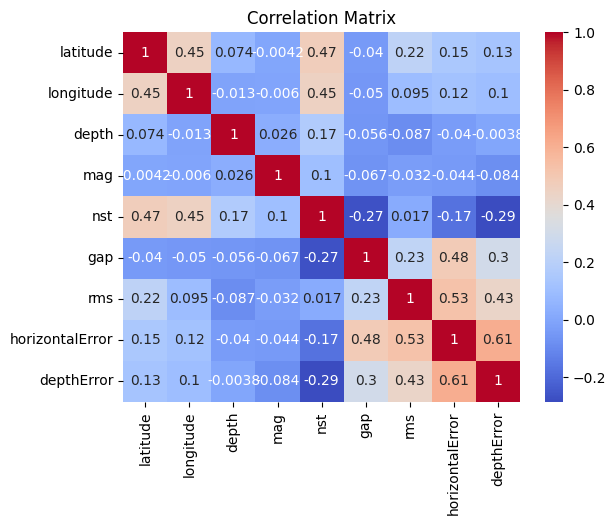

In [79]:
# Select the numerical columns for correlation analysis
numeric_cols = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'rms', 'horizontalError', 'depthError']

# Create correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
import pandas as pd

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Filter for years 2022 and 2023
df_filtered = df[(df['time'].dt.year >= 2022) & (df['time'].dt.year <= 2023)]

# Create a year-month column
df_filtered['year_month'] = df_filtered['time'].dt.to_period('M')

# Group by year-month and calculate count and average magnitude
monthly_stats = df_filtered.groupby('year_month').agg(
    earthquake_count=('time', 'count'),
    avg_magnitude=('mag', 'mean')
).reset_index()

# Convert year_month back to string for clarity
monthly_stats['year_month'] = monthly_stats['year_month'].astype(str)
# Save to Excel file
monthly_stats.to_excel('earthquake_monthly_summary.xlsx', index=False)

print("Data saved to 'earthquake_monthly_summary.xlsx'")

Data saved to 'earthquake_monthly_summary.xlsx'


/var/folders/k3/d8z_dxn96jd00k571s9c8sx40000gn/T/ipykernel_85529/1019772903.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_filtered['year_month'] = df_filtered['time'].dt.to_period('M')


In [19]:
df_summary = pd.read_excel('earthquake_monthly_summary.xlsx')
df_summary.head()

,year_month,earthquake_count,avg_magnitude
0,2022-01,73,2.867397
1,2022-02,63,2.852698
2,2022-03,96,2.868229
3,2022-04,73,2.817397
4,2022-05,77,2.752338


AttributeError: Can only use .dt accessor with datetimelike values

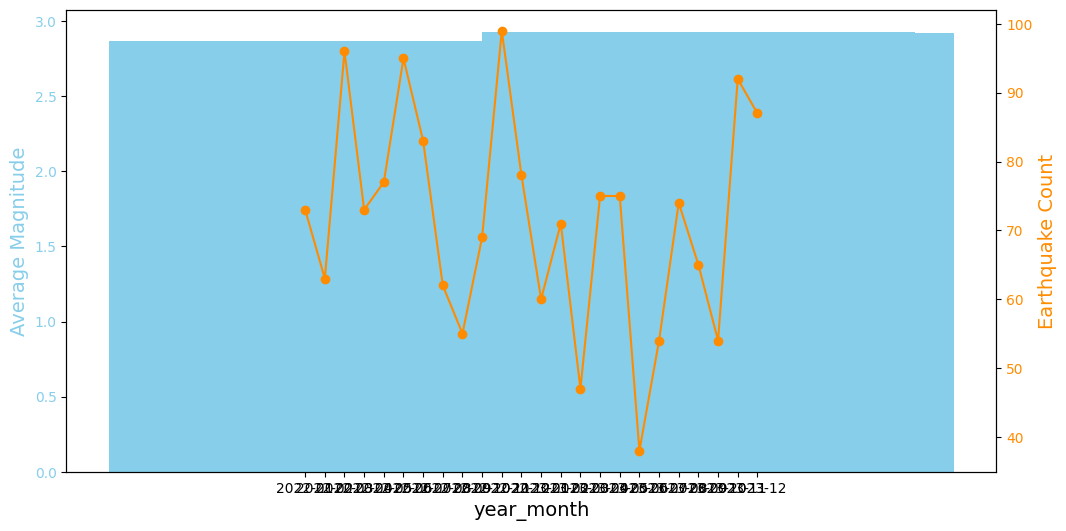

In [21]:
import matplotlib.pyplot as plt

# Assume your DataFrame is called df_summary with columns:
# 'month' (e.g., '2022-01'), 'avg_magnitude', 'earthquake_count'

# Convert month to datetime for consistent plotting
df['year_month'] = pd.to_datetime(df_summary['year_month'])

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bar chart for average magnitude
bar = ax1.bar(df_summary['year_month'], df_summary['avg_magnitude'], 
              color='skyblue', width=20, label='Average Magnitude')
ax1.set_ylabel('Average Magnitude', fontsize=14, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create second y-axis
ax2 = ax1.twinx()

# Plot line chart for earthquake count
line = ax2.plot(df_summary['year_month'], df_summary['earthquake_count'], 
                color='darkorange', marker='o', label='Earthquake Count')
ax2.set_ylabel('Earthquake Count', fontsize=14, color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Formatting x-axis
ax1.set_xlabel('year_month', fontsize=14)
ax1.set_xticks(df_summary['year_month'])
ax1.set_xticklabels(df_summary['year_month'].dt.strftime('%Y-%m'), rotation=45)

# Title and layout
plt.title('Monthly Earthquake Summary', fontsize=16)
fig.tight_layout()

# Show plot
plt.show()